In [2]:
import os
import numpy as np
import torch
from torchvision import transforms, datasets, utils
from torch.utils.data import Dataset, DataLoader
from skimage import io, color
from PIL import Image
import random
import matplotlib.pyplot as plt

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
    ])

target_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
    ])

In [5]:
data_dir = '/home/dyj/data/lung_training_data'

class LungDataset(Dataset):
    def __init__(self, root, data_transform, target_transform):
        self.root = root
        self.data_transform = data_transform
        self.target_transform = target_transform
        self.IMAGE_EXT = ['png', 'jpeg', 'jpg', 'bmp']
        self.seed = 123
        train_list = {'train': [], 'val': []}
        
        # for x in ['train', 'val']:
        #     train_list[x] = []
        #     for dirpath, dnames, fnames in os.walk(os.path.join(self.root, x)):
        #         for f in fnames:
        #             if f.endswith(tuple(self.IMAGE_EXT)):
        #                 train_list[x].append(os.path.join(dirpath, f))

        for dirpath, dnames, fnames in os.walk(os.path.join(self.root, 'train')):
            for f in fnames:
                if f.endswith(tuple(self.IMAGE_EXT)):
                    train_list['train'].append(os.path.join(dirpath, f))
                    f = f.split('.')[0] + '.bmp'
                    train_list['val'].append(os.path.join(os.path.join(dirpath, '../val'), f))

        self.images = train_list['train']
        self.targets = train_list['val']
        self.dataLength = len(train_list['train'])
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        
        image = Image.open(self.images[idx])
        target = Image.open(self.targets[idx])
        
        # just in case it is single channel
        image = image.convert('RGB')
#       target = target.convert('RGB')

        if self.data_transform:
            random.seed(self.seed)
            image = self.data_transform(image)
            
        if self.target_transform:    
            random.seed(self.seed)
            target = self.target_transform(target)
            target = np.expand_dims(np.asarray(target).astype(np.float32), axis=0)
            
        return [image, torch.from_numpy(target)]
    
    def view(self, idx):
        fig = plt.figure()
        img, target = self.__getitem__(idx)
        
        img = img.numpy()
        target = target.numpy()
        
        ## For plt Dim must be (H,W,C)
        plt.subplot(121)
        plt.imshow(np.transpose(img, (1,2,0)))
         
#         target = np.transpose(target, (1,2,0))
        target = np.squeeze(target, axis=0)
        print(target.shape)
        plt.subplot(122)

        plt.imshow(target)
        plt.show()

    def getRandItem(self):

        idx = random.randint(0, self.dataLength - 1)

        image = Image.open(self.images[idx])
        target = Image.open(self.targets[idx])

        # just in case it is single channel
        image = image.convert('RGB')
        target = target.convert('RGB')

        return [np.asarray(image), np.asarray(target)]

img type is <class 'numpy.ndarray'> and size is (192, 192, 3)
target type is <class 'numpy.ndarray'> and size is (192, 192, 3)


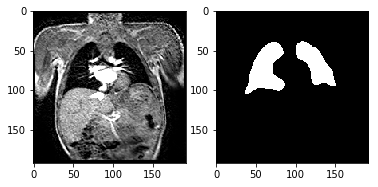

In [28]:
lung424 = LungDataset(root=data_dir, data_transform=data_transform, target_transform=target_transform)

img, target = lung424.getRandItem()
print('img type is {} and size is {}'.format(type(img), img.shape))
print('target type is {} and size is {}'.format(type(target), target.shape))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(target * 255)
plt.show()